In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
from skimage.feature import hog
from skimage import data ,exposure

In [4]:
pip install --user opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
img_1 = cv2.imread("C:\\Users\\aedpu\\Downloads\\tower.jpg")
img_1

array([[[ 88,  57,  32],
        [ 88,  57,  32],
        [ 88,  57,  32],
        ...,
        [ 84,  53,  28],
        [ 84,  53,  28],
        [ 84,  53,  28]],

       [[ 88,  57,  32],
        [ 88,  57,  32],
        [ 88,  57,  32],
        ...,
        [ 84,  53,  28],
        [ 84,  53,  28],
        [ 84,  53,  28]],

       [[ 88,  57,  32],
        [ 88,  57,  32],
        [ 88,  57,  32],
        ...,
        [ 84,  53,  28],
        [ 84,  53,  28],
        [ 84,  53,  28]],

       ...,

       [[ 78, 146, 135],
        [ 74, 142, 131],
        [ 70, 138, 127],
        ...,
        [ 70, 138, 127],
        [ 58, 126, 115],
        [ 70, 138, 127]],

       [[ 79, 147, 136],
        [ 71, 139, 128],
        [ 72, 140, 129],
        ...,
        [ 65, 133, 122],
        [ 57, 125, 114],
        [ 66, 134, 123]],

       [[ 68, 136, 125],
        [ 70, 138, 127],
        [ 75, 143, 132],
        ...,
        [ 54, 122, 111],
        [ 62, 130, 119],
        [ 77, 145, 134]]

In [6]:
img = cv2.resize(img_1,(512,512))
img.shape

(512, 512, 3)

In [7]:
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Color Conversion

In [8]:
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
GRAY=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


In [9]:
cv2.imshow('Gr',GRAY)
cv2.waitKey(0)
cv2.destroyAllWindows()

# scale invariance

In [10]:
sc_iv = cv2.pyrDown(rgb)
sc_iv2 = cv2.pyrDown(sc_iv)
num_rows, num_cols = sc_iv2. shape[:2]
print(num_rows)
print(num_cols)

128
128


In [11]:
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('first scale',sc_iv)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('second scale',sc_iv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotational invariance

In [12]:
rot_iv = cv2.getRotationMatrix2D((num_rows/2, num_cols/2),45,1)

# affine tranformation

In [13]:
aff  = cv2.warpAffine(sc_iv2,rot_iv,(num_rows, num_cols))

In [14]:
aff

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# Colour Conversion

In [15]:
rot_gray = cv2.cvtColor(aff,cv2.COLOR_RGB2GRAY)

# Rotational Display

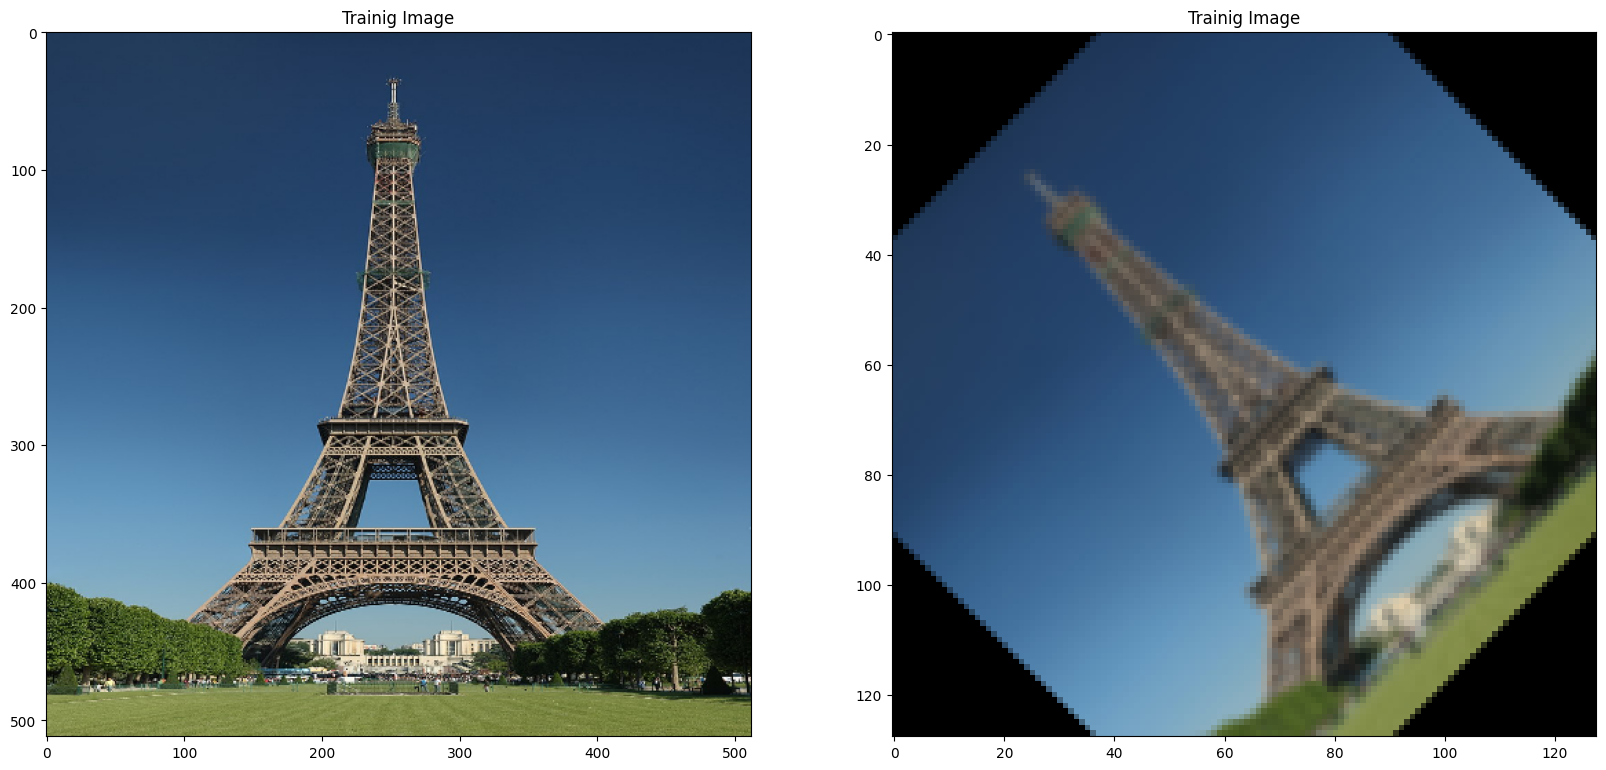

In [16]:
fx , plots = plt.subplots(1,2,figsize=(20,10))

plots[0].set_title("Trainig Image")
plots[0].imshow(rgb)

plots[1].set_title("Trainig Image")
plots[1].imshow(aff)

# color change

In [17]:
rot_gray = cv2.cvtColor(aff,cv2.COLOR_RGB2GRAY)

# SIFT

In [18]:
sift = cv2.SIFT_create()

In [19]:
import cv2
print(cv2.__version__)


4.10.0


# Detect and Compute

In [20]:
train_kp , train_des = sift.detectAndCompute(sc_iv,None)
test_kp , test_des = sift.detectAndCompute(rot_gray,None)

# Keypoints 

In [21]:
kp_wo_size = np.copy(rgb)
kp_w_size = np.copy(rgb)

In [22]:
cv2.drawKeypoints(sc_iv,train_kp , kp_w_size , color = (0 , 255 , 0))
cv2.drawKeypoints(sc_iv,train_kp, kp_w_size , flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[ 32,  57,  88],
        [ 32,  57,  88],
        [ 32,  57,  88],
        ...,
        [ 28,  53,  84],
        [ 28,  53,  84],
        [ 28,  53,  84]],

       [[ 32,  57,  88],
        [ 32,  57,  88],
        [ 32,  57,  88],
        ...,
        [ 28,  53,  84],
        [ 28,  53,  84],
        [ 28,  53,  84]],

       [[ 32,  57,  88],
        [ 32,  57,  88],
        [ 33,  58,  89],
        ...,
        [ 28,  53,  84],
        [ 28,  53,  84],
        [ 28,  53,  84]],

       ...,

       [[131, 142,  75],
        [133, 144,  77],
        [134, 145,  78],
        ...,
        [120, 130,  63],
        [118, 128,  61],
        [121, 131,  64]],

       [[137, 148,  81],
        [137, 148,  80],
        [133, 144,  76],
        ...,
        [114, 125,  57],
        [108, 119,  51],
        [115, 127,  59]],

       [[130, 141,  73],
        [128, 139,  71],
        [128, 138,  70],
        ...,
        [119, 130,  62],
        [116, 128,  59],
        [120, 131,  63]]

# KEY POINTS DISPLAY

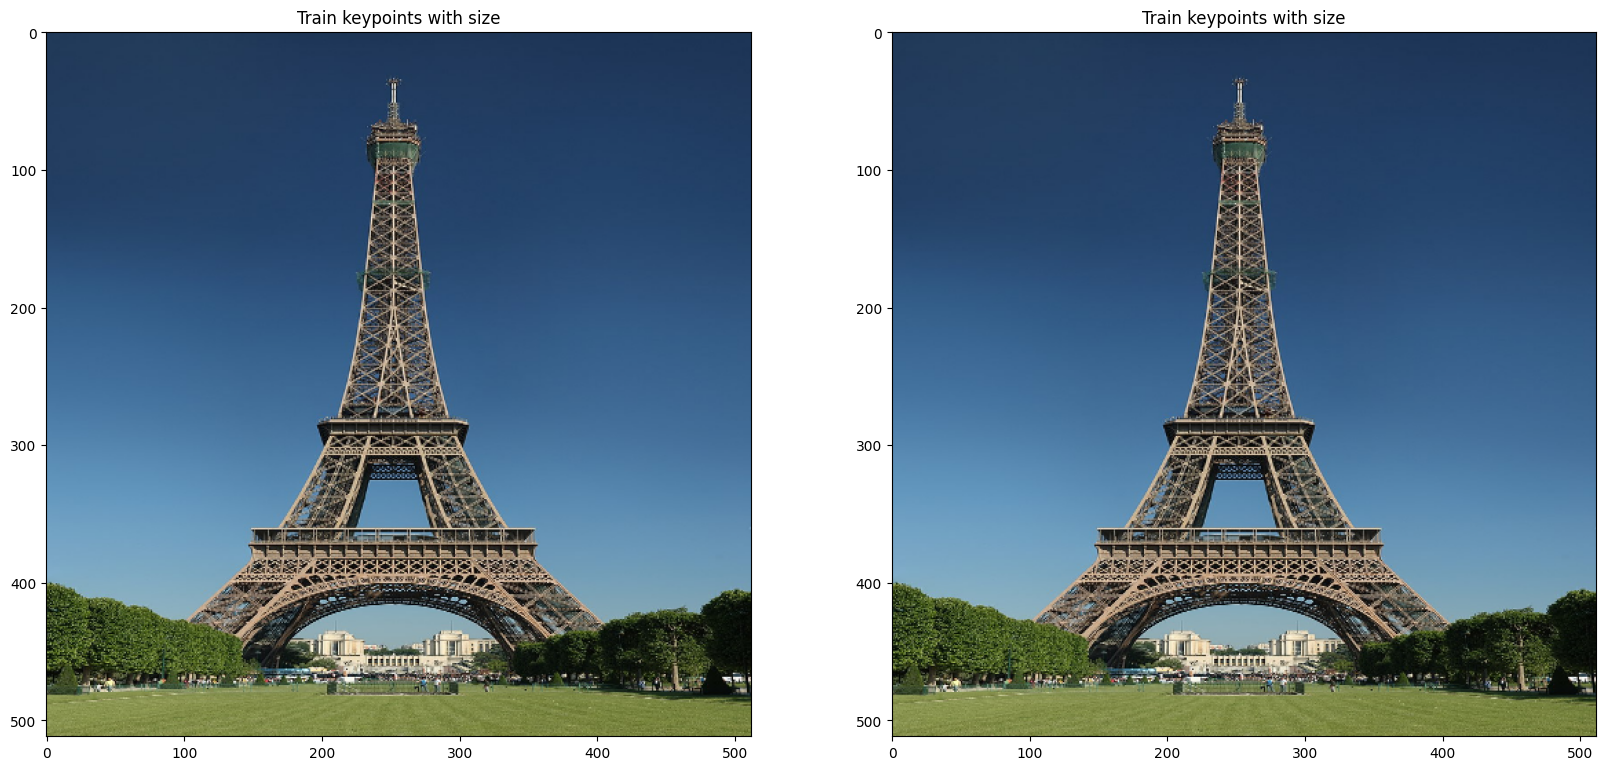

In [23]:
fx , plots = plt.subplots(1,2 , figsize=(20,10))

plots[0].set_title("Train keypoints with size")
plots[0].imshow(kp_w_size , cmap = 'gray')

plots[1].set_title("Train keypoints with size")
plots[1].imshow(kp_wo_size , cmap = 'gray')

# Brute Force Matcher Object 

In [24]:
bfm = cv2.BFMatcher(cv2.NORM_L1,crossCheck = False)

# Matching

In [25]:
match = bfm.match(train_des,test_des)

# sorting

In [26]:
match = sorted(match , key = lambda x : x.distance)

Drawing Matches 

In [27]:
result = cv2.drawMatches(sc_iv, train_kp, rot_gray, test_kp, match, rot_gray, flags=2)

In [28]:
result = cv2.drawMatches(sc_iv, train_kp, rot_gray, test_kp, match, rot_gray, flags=2)

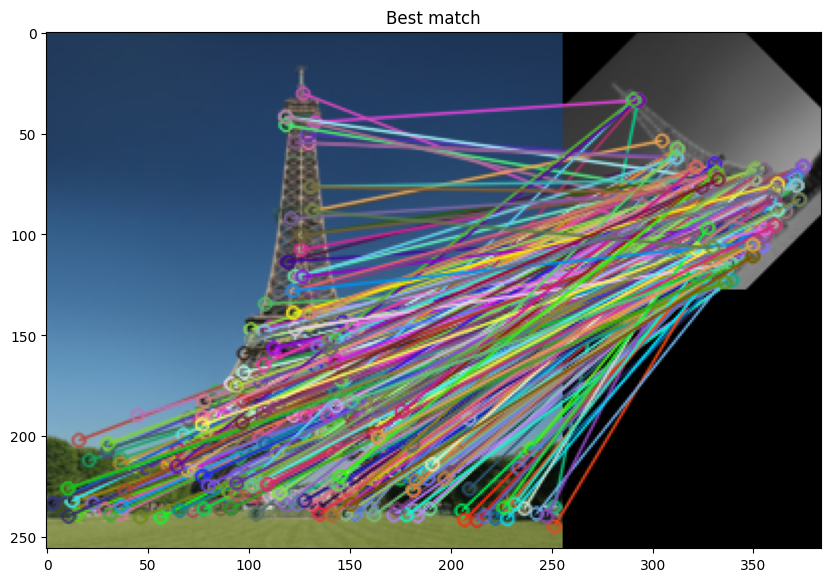

In [29]:
plt.rcParams["figure.figsize"] = [10.0 , 10.0]
plt.title("Best match")
plt.imshow(result)
plt.show()

In [ ]:
q